In [3]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
NTS_dummy = pd.read_csv('/content/drive/MyDrive/socio_pred/UKDA-5340-tab/NTS_v2.csv')

In [33]:
NTS_dummy.shape

(2445, 137)

In [68]:
# reolace NA with zero
#na occurs for std of users with one trip, or count of users with no weekend trip
NTS_dummy = NTS_dummy.fillna(0)

For n_clusters = 2 The average silhouette_score is : 0.1882350212238352
For n_clusters = 3 The average silhouette_score is : 0.19117868603717503
For n_clusters = 4 The average silhouette_score is : 0.14278627947865558
For n_clusters = 5 The average silhouette_score is : 0.1392152497226897
For n_clusters = 6 The average silhouette_score is : 0.12983747128759449
For n_clusters = 7 The average silhouette_score is : 0.13381436405986114
For n_clusters = 8 The average silhouette_score is : 0.12749715026629427
For n_clusters = 9 The average silhouette_score is : 0.12503256122549383
For n_clusters = 10 The average silhouette_score is : 0.13108280887950902
For n_clusters = 11 The average silhouette_score is : 0.13289726646987388
For n_clusters = 12 The average silhouette_score is : 0.13168558294166693
For n_clusters = 13 The average silhouette_score is : 0.13488202340974612
For n_clusters = 14 The average silhouette_score is : 0.13438406349435894
For n_clusters = 15 The average silhouette_score

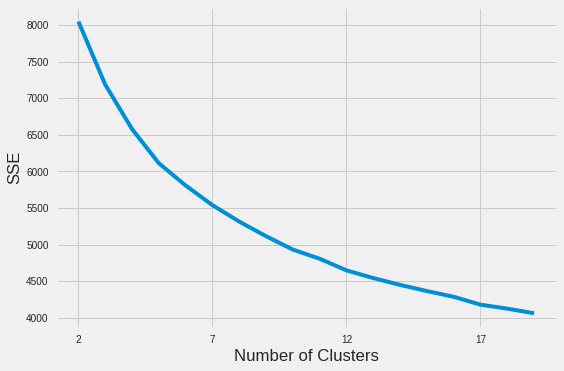

7


In [100]:
# kmeans
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
 
 
def elbow(df,norm=1):
  mobility = df.iloc[:,38:]
  # socio = df.drop(columns = ['Individual ID',	'TripID',\
  #                                   'SurveyYear']).iloc[:,110:]
  features = np.array(mobility)
  if norm ==1:  #standardze
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
  kmeans_kwargs = {
      "init": "random",
      "n_init": 10,
      "max_iter": 300,
      "random_state": 42,
  }

  # A list holds the SSE values for each k
  sse = []
  #fig, ax = plt.subplots(10, 2, figsize=(15,16))
  max_cluster = min(20,df.shape[0])
  for k in range(2, max_cluster):
      kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
      kmeans.fit(features)
      cluster_labels = kmeans.fit_predict(features)
      silhouette_avg = silhouette_score(features, cluster_labels)
      print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )
      sse.append(kmeans.inertia_)
      # q, mod = divmod(k, 2)
      # '''
      # Create SilhouetteVisualizer instance with KMeans instance
      # Fit the visualizer
      # '''
      # visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
      # visualizer.fit(features)

  plt.style.use("fivethirtyeight")
  plt.plot(range(2, max_cluster), sse)
  plt.xticks(range(2, max_cluster,5))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.show()

  kl = KneeLocator(
    range(2, max_cluster), sse, curve="convex", direction="decreasing"
  )
  print(kl.elbow)
  return 

elbow(NTS_dummy,norm=1)

In [ ]:

def kplot(df,k,norm=1):
  # f: number of features, default three sentiments
  
  

  features = np.array(mobility)

  if norm ==1:  #standardze
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
  kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
  }
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(features)

  socio['label'] = kmeans.labels_
  mobility['label'] = kmeans.labels_

  
  return socio,mobility

In [ ]:
socio,mobility = kplot(NTS_dummy,16,norm=1)

In [ ]:
mobility.groupby('label').size()

label
0      44
1     208
2      73
3      54
4     189
5      62
6      65
7      73
8     160
9      79
10    138
11     92
12    124
13    618
14     84
15    382
dtype: int64

In [ ]:
socio.groupby('label').sum()

NameError: ignored

Statistical Test


In [ ]:
import scipy.stats as stats
def chi2stat(df,var):
  df = df.groupby('label').sum()[var]
  #for chi2 test, min freq should be at least 5
  var2 = (df>4).all()[(df>4).all()==True].index 
  
  chi2 = stats.chi2_contingency(df[var2])
  if len(var2)<2:
    print('Not enough data')
  print('P_value: ',chi2[1])
  return


#data = socio.groupby('label').sum()[age].T
#df = df[df>5] #for chi2 test, min freq should be at least 5


In [ ]:
vars = [age ,sex,marital,ethincity,caraccess,license,income,work,\
        socialclass,hhincome,tenancy,hh_struc,hh_work,hh_emp,\
        hh_socialclass,urban_rural,car]

for v in vars:
  print(v[0])
  chi2stat(socio,v)
  print('-----')
  

Age_B04ID_4
P_value:  0.0012606205069416252
-----
Sex_B01ID_1
P_value:  1.6908710977649324e-07
-----
MarStat_B01ID_1
P_value:  1.009345682195159e-12
-----
EthGroupTS_B02ID_1
Not enough data
P_value:  1.0
-----
CarAccess_B01ID_1
Not enough data
P_value:  1.0
-----
DrivLic_B02ID_1
Not enough data
P_value:  1.0
-----
IndIncome2002_B02ID_1
P_value:  1.076723868234455e-18
-----
EcoStat_B02ID_1
Not enough data
P_value:  1.0
-----
SC_B01ID_1
P_value:  0.040550923637145624
-----
HHIncome2002_B02ID_1
P_value:  1.548613980567974e-12
-----
Ten1_B02ID_1
P_value:  0.00043376073133279727
-----
HHoldStruct_B02ID_1
Not enough data
P_value:  1.0
-----
HRPWorkStat_B02ID_1
P_value:  0.00022402502326851706
-----
HRPEmpStat_B01ID_1
P_value:  0.16282648840090352
-----
HRPSEGWorkStat_B01ID_1
P_value:  0.012196946598177058
-----
Settlement2011EW_B03ID_1
P_value:  5.026868827173517e-10
-----
VehAvail_B01ID_1
Not enough data
P_value:  1.0
-----


In [ ]:
#variables with significance differences among different mobility clusters
#[age ,sex,marital,income,socialclass,hhincome,tenancy,hh_work,\
        #hh_socialclass,urban_rural]

In [ ]:
mobility.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
socio.corr().style.background_gradient(cmap='coolwarm')


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from numpy import mean, std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define dataset
x = mobility.iloc[:,:-1]
scaler = MinMaxScaler().fit(x)
x = scaler.transform(x)

y = socio[income]
label_encoder = LabelEncoder()
y = y.idxmax(axis=1)


X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)


feature_names = mobility.iloc[:,:-1].columns
forest = RandomForestClassifier(random_state=0)

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(forest, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.578 (0.018)


In [ ]:
y.value_counts()

IndIncome2002_B02ID_1    1392
IndIncome2002_B02ID_2     744
IndIncome2002_B02ID_3     309
dtype: int64

In [ ]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


In [ ]:
#RF_imp = pd.DataFrame()
RF_imp= forest_importances.sort_values(ascending = False).reset_index()\
.rename(columns={"index": "feature", 0: "Importance"})


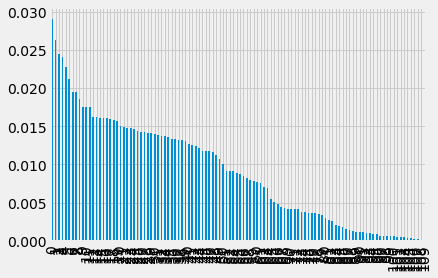

In [ ]:
RF_imp['Importance'].plot.bar()

In [ ]:
RF_imp[RF_imp['Importance']>0.01]

,feature,Importance
0,TripEnd_B01ID_9,0.029147
1,TripEnd_B01ID_12,0.026352
2,TripStart_B01ID_11,0.024503
3,TravelWeekDay_B03ID_1,0.024093
4,Total Number of Trips,0.022803
5,TripStart_B01ID_8,0.021244
6,TripStart_B01ID_15,0.019540
7,TripEnd_B01ID_11,0.019504
8,TripStart_B01ID_12,0.018642
9,TripStart_B01ID_9,0.017576


In [ ]:
RF_imp[RF_imp['Importance']<0.001]

,feature,Importance
93,TripTotalTime_B01ID_10,0.000968
94,TripStart_B01ID_5,0.000905
95,TripEnd_B01ID_5,0.000877
96,TripEnd_B01ID_2,0.000660
97,TripDisExSW_B01ID_12,0.000626
98,TripTravTime_B01ID_12,0.000619
99,TripStart_B01ID_2,0.000603
100,TripDisIncSW_B01ID_12,0.000580
101,TripStart_B01ID_3,0.000479
102,TripEnd_B01ID_4,0.000435


In [ ]:
samp = socio[income]
samp['TripEnd_B01ID_9'] = mobility['TripEnd_B01ID_9'] #most important
samp['TripStart_B01ID_4'] = mobility['TripStart_B01ID_4'] #least important

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#sample of the most important factor for predictin income
#avg number of trips for lower income
samp[samp['IndIncome2002_B02ID_1']==1]['TripEnd_B01ID_9'].mean()

1.3994252873563218

In [ ]:
#avg number of trips for middle income

samp[samp['IndIncome2002_B02ID_2']==1]['TripEnd_B01ID_9'].mean()

1.6370967741935485

In [ ]:
#avg number of trips for higher income
samp[samp['IndIncome2002_B02ID_3']==1]['TripEnd_B01ID_9'].mean()

1.7831715210355987

In [ ]:
#sample of the least important factor for predicting income
#avg number of trips for lower income

samp[samp['IndIncome2002_B02ID_1']==1]['TripStart_B01ID_4'].mean()

0.004310344827586207

In [ ]:
#avg number of trips for middle income

samp[samp['IndIncome2002_B02ID_2']==1]['TripStart_B01ID_4'].mean()

0.004032258064516129

In [ ]:
#avg number of trips for higher income
samp[samp['IndIncome2002_B02ID_3']==1]['TripStart_B01ID_4'].mean()

0.003236245954692557

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f' % (mean(n_scores)))

Mean Accuracy: 0.579
